In [137]:
# imports
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import string
import os

In [121]:
# installs
# !pip install numpy matplotlib pandas

# data praperation

In [138]:
# readIn
datapath = './data'
fileName = 'agriRuralDevelopment.csv'

# print(os.path.join(datapath, fileName))
df = pd.read_csv(os.path.join(datapath, fileName), index_col=False)
for val in df.columns.values: 
    print(val)
df.head()

Country Name
Country Code
year
Access to electricity (% of population)
Access to electricity, rural (% of rural population)
Agricultural irrigated land (% of total agricultural land)
Agricultural land (% of land area)
Agricultural land (sq. km)
Agricultural machinery, tractors
Agricultural machinery, tractors per 100 sq. km of arable land
Agricultural methane emissions (% of total)
Agricultural methane emissions (thousand metric tons of CO2 equivalent)
Agricultural nitrous oxide emissions (% of total)
Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)
Agricultural raw materials exports (% of merchandise exports)
Agricultural raw materials imports (% of merchandise imports)
Agriculture, forestry, and fishing, value added (% of GDP)
Agriculture, forestry, and fishing, value added (current US$)
Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)
Arable land (% of land area)
Arable land (hectares per person)
Arable land (hectares)
Averag

,Country Name,Country Code,year,Access to electricity (% of population),"Access to electricity, rural (% of rural population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",...,Permanent cropland (% of land area),"Population, total",Rural land area (sq. km),Rural land area where elevation is below 5 meters (% of total land area),Rural land area where elevation is below 5 meters (sq. km),Rural population,Rural population (% of total population),Rural population growth (annual %),Rural population living in areas where elevation is below 5 meters (% of total population),Surface area (sq. km)
0,Afghanistan,AFG,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8996973.0,NaN,NaN,NaN,8241137.0,91.599,NaN,NaN,NaN
1,Afghanistan,AFG,1961,NaN,NaN,NaN,57.745918,377000.0,120.0,0.156863,...,0.076586,9169410.0,NaN,NaN,NaN,8373138.0,91.316,1.589040,NaN,652860.0
2,Afghanistan,AFG,1962,NaN,NaN,NaN,57.837821,377600.0,150.0,0.194805,...,0.091903,9351441.0,NaN,NaN,NaN,8512056.0,91.024,1.645479,NaN,652860.0
3,Afghanistan,AFG,1963,NaN,NaN,NaN,57.914407,378100.0,200.0,0.258065,...,0.091903,9543205.0,NaN,NaN,NaN,8657977.0,90.724,1.699758,NaN,652860.0
4,Afghanistan,AFG,1964,NaN,NaN,NaN,58.010906,378730.0,200.0,0.256410,...,0.111816,9744781.0,NaN,NaN,NaN,8810646.0,90.414,1.747967,NaN,652860.0


In [139]:
# replace column names
names = df.columns.values
names = list(map(lambda x: x.split(' (')[0].replace(" ", "_"), names))
names = list(map(lambda x: x.replace(',', ''), names))
names = list(map(lambda x: x.replace('.', ''), names))
names = list(map(lambda x: '_'.join(x.split('_')[:]), names))
short_names = list(map(lambda x: x[0:10], names))


short_names

['Country_Na',
 'Country_Co',
 'year',
 'Access_to_',
 'Access_to_',
 'Agricultur',
 'Agricultur',
 'Agricultur',
 'Agricultur',
 'Agricultur',
 'Agricultur',
 'Agricultur',
 'Agricultur',
 'Agricultur',
 'Agricultur',
 'Agricultur',
 'Agricultur',
 'Agricultur',
 'Annual_fre',
 'Arable_lan',
 'Arable_lan',
 'Arable_lan',
 'Average_pr',
 'Birth_rate',
 'Cereal_pro',
 'Cereal_yie',
 'CPIA_gende',
 'Crop_produ',
 'Death_rate',
 'Employment',
 'Employment',
 'Employment',
 'Fertilizer',
 'Fertilizer',
 'Food_produ',
 'Forest_are',
 'Forest_are',
 'GDP_per_ca',
 'Land_area',
 'Land_under',
 'Literacy_r',
 'Livestock_',
 'Mineral_re',
 'Mortality_',
 'Net_migrat',
 'Permanent_',
 'Population',
 'Rural_land',
 'Rural_land',
 'Rural_land',
 'Rural_popu',
 'Rural_popu',
 'Rural_popu',
 'Rural_popu',
 'Surface_ar']

## Visualisation

### no imputation no cleanup

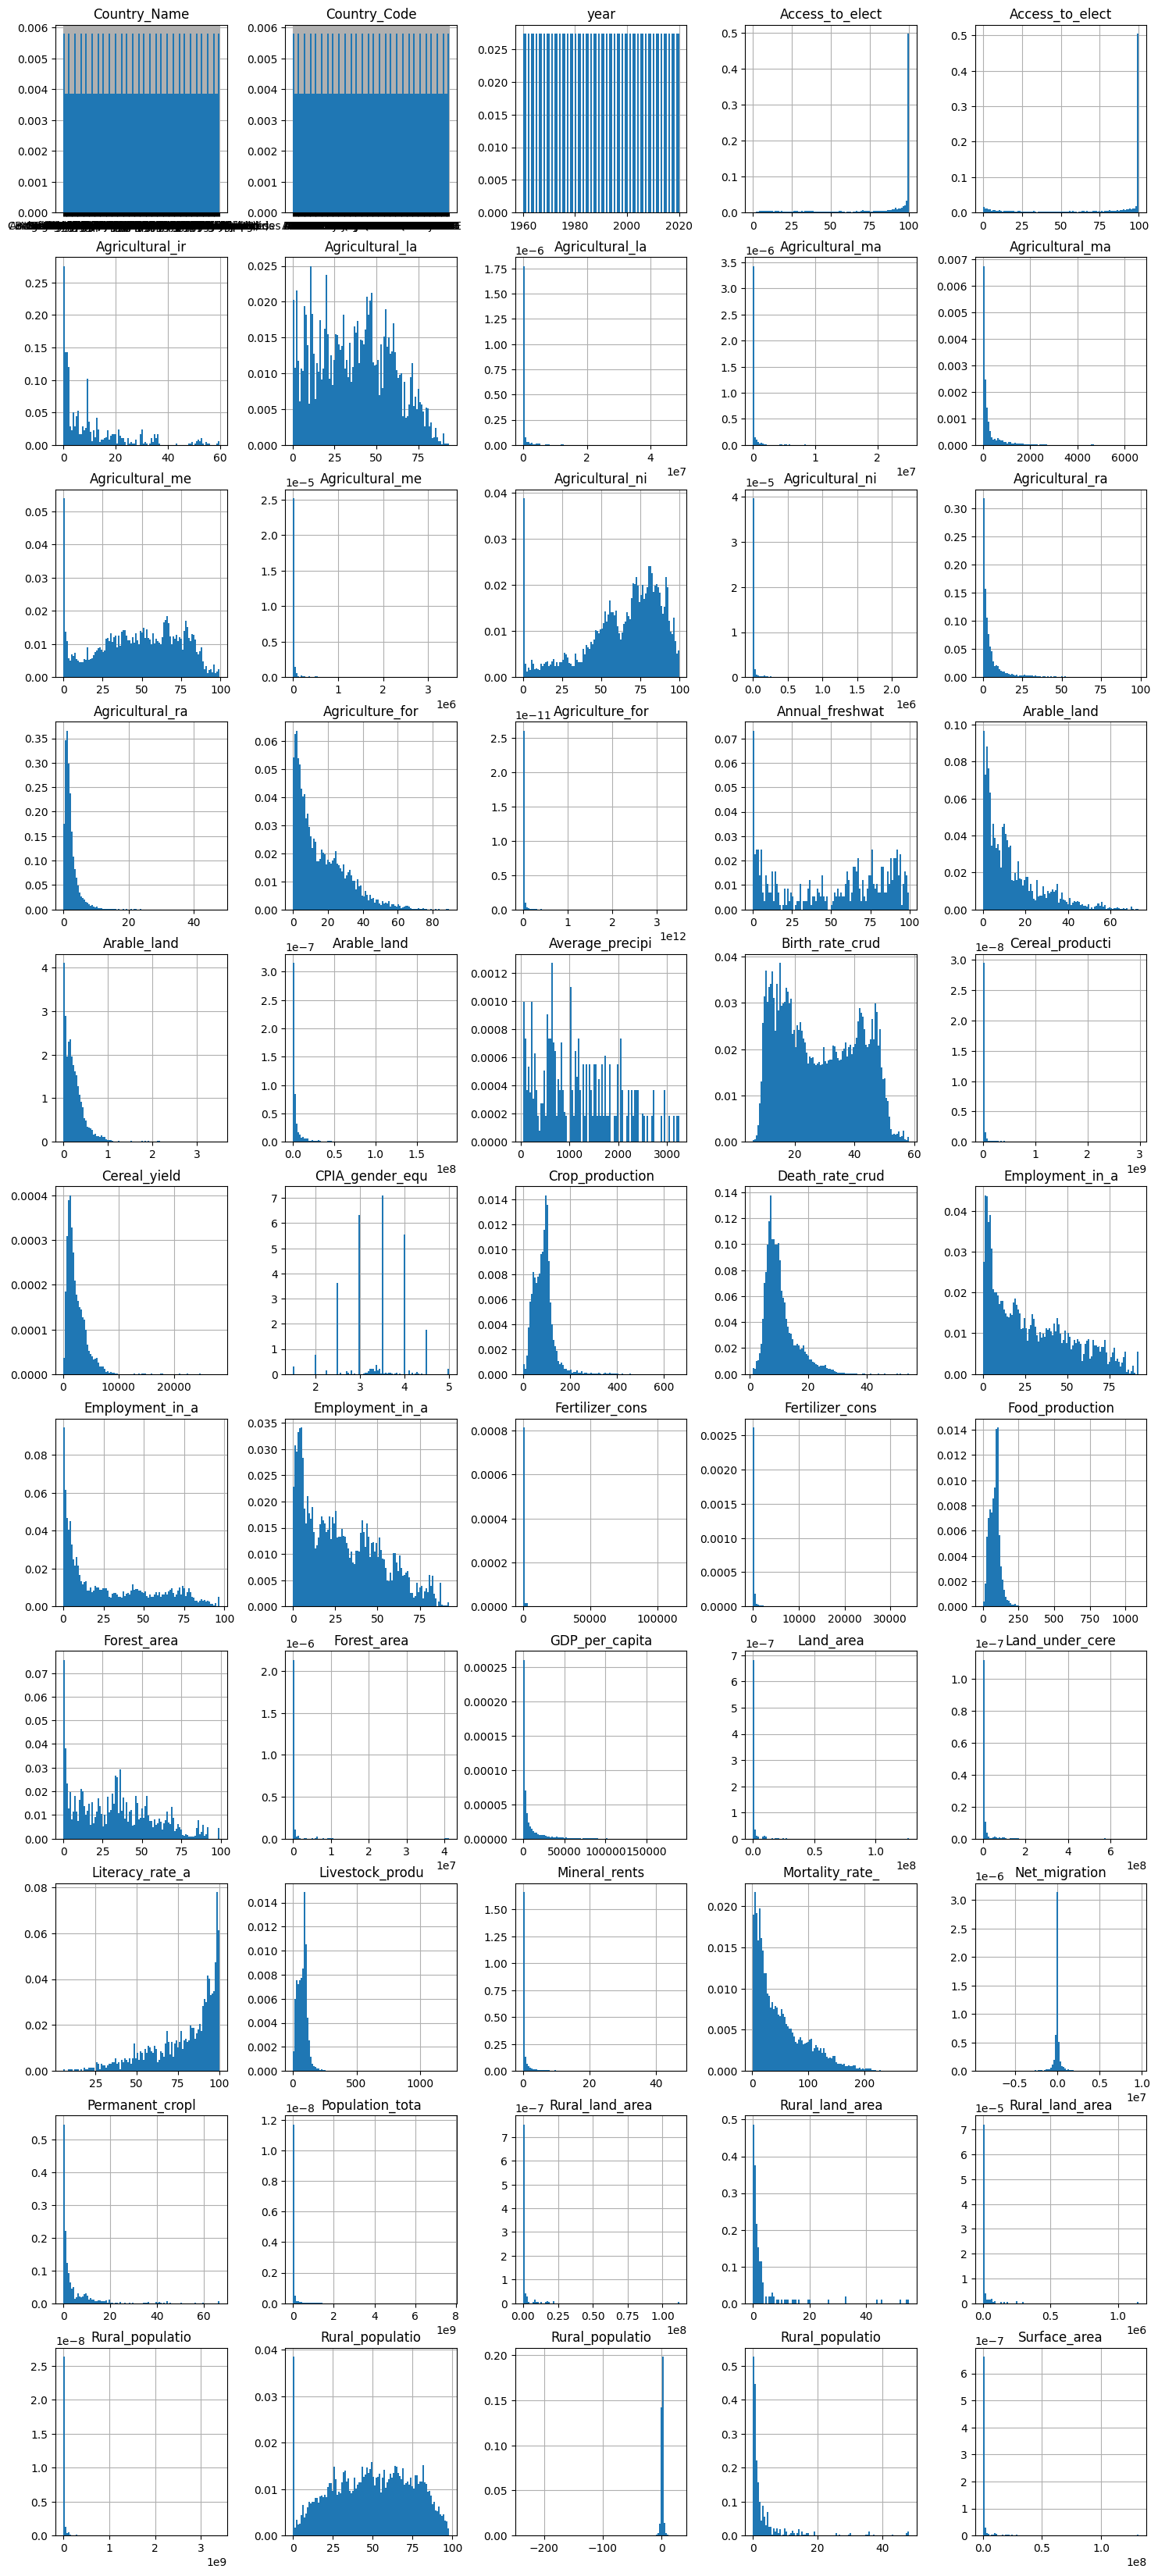

In [140]:
# varable distribution overview
fig, axs = plt.subplots(11,5, figsize=(15,33))
fig.tight_layout(pad=2.0)
# fig.suptitle("distribution overview per feature")
for i, nam in enumerate(df.columns.values):
    ax = axs[i//5, i%5]
    ax.set_title(names[i][0:15])
    ax.hist(data[nam], bins=100, density=True)
    ax.set_axisbelow(True)
    ax.grid()


/var/folders/3c/t08nl7456zl9jcq07p2xt7x80000gn/T/ipykernel_57722/816694153.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=False)


<AxesSubplot: title={'center': 'Correlation plot'}>

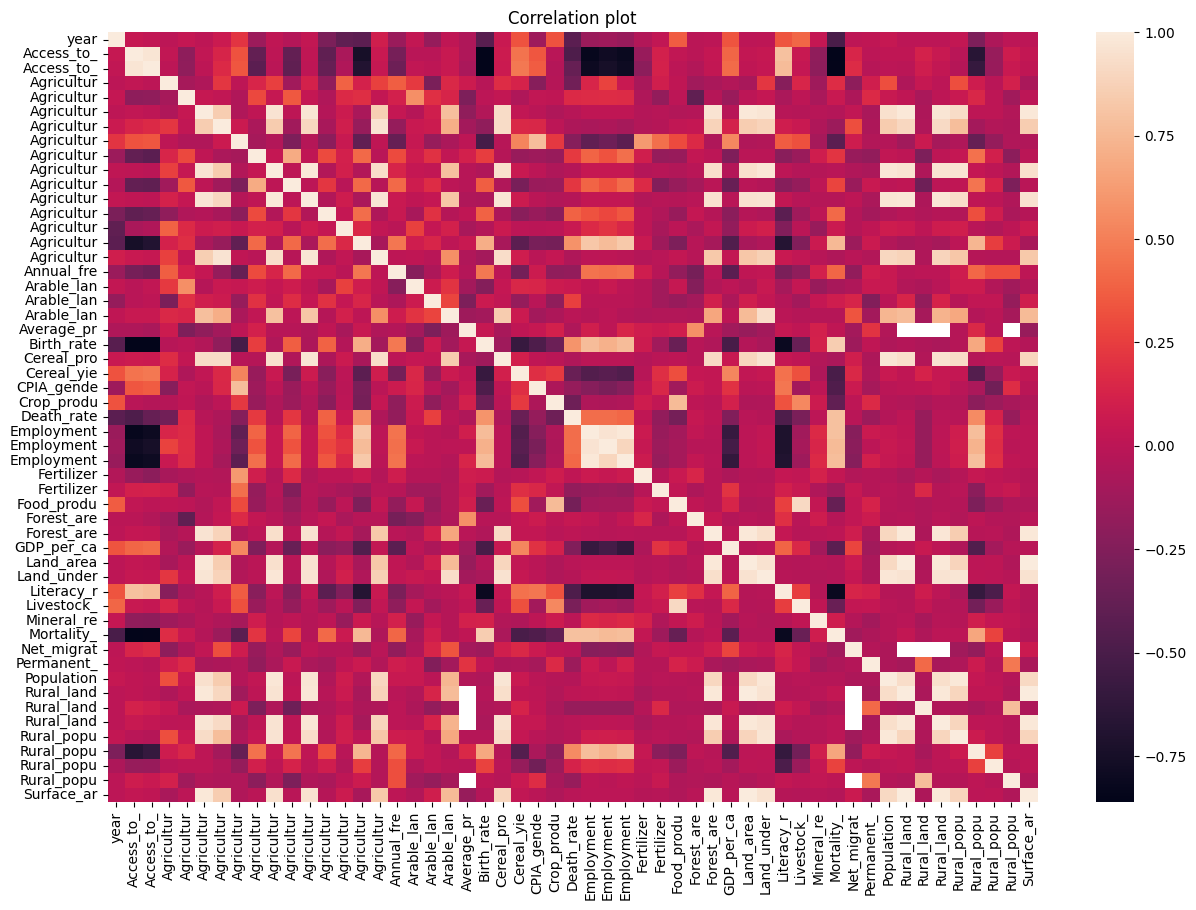

In [136]:
# heatmap - correlation visualisation
df_short = df.copy()
df_short.columns = short_names
plt.figure(figsize=(15,10))
plt.title("Correlation plot")
sns.heatmap(data=df.corr(), annot=False)